In [1]:
import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
rho = 1
mu = 1
u_in = 1
D = 1
L = 2

In [3]:
geom = dde.geometry.Rectangle(xmin=[-L/2, -D/2], xmax=[L/2, D/2])

In [4]:
def boundary_wall(X, on_boundary):
    print("X",X)
    print("on_boundary",on_boundary)
    on_wall = np.logical_and(np.logical_or(np.isclose(X[1],-D/2,rtol=1e-05,atol=1e-08),np.isclose(X[1],D/2,rtol=1e-05,atol=1e-08)),on_boundary)
    return on_wall

def boundary_inlet(X,on_boundary):
    on_inlet = np.logical_and(np.isclose(X[0],-L/2,rtol=1e-05,atol=1e-08),on_boundary)
    return on_inlet

def boundary_outlet(X,on_boundary):
    on_outlet = np.logical_and(np.isclose(X[0],L/2,rtol=1e-05,atol=1e-08),on_boundary)
    return on_outlet

In [5]:
bc_wall_u = dde.DirichletBC(geom, lambda X:0., boundary_wall, component= 0)
bc_wall_v = dde.DirichletBC(geom, lambda X:0., boundary_wall, component= 1)

bc_inlet_u = dde.DirichletBC(geom, lambda X:u_in, boundary_inlet, component= 0)
bc_inlet_v = dde.DirichletBC(geom, lambda X:0.   , boundary_inlet, component= 1)

bc_outlet_p = dde.DirichletBC(geom, lambda X:0.  , boundary_outlet, component= 2)
bc_outlet_v = dde.DirichletBC(geom, lambda X:0.  , boundary_outlet, component= 1)

In [6]:
def pde(X,Y):
    du_x =dde.grad.jacobian(Y, X, i=0, j=0)
    du_y =dde.grad.jacobian(Y, X, i=0, j=1)
    dv_x =dde.grad.jacobian(Y, X, i=1, j=0)
    dv_y =dde.grad.jacobian(Y, X, i=1, j=1)
    dp_x =dde.grad.jacobian(Y, X, i=2, j=0)
    dp_y =dde.grad.jacobian(Y, X, i=2, j=1)
    
    du_xx = dde.grad.hessian(Y, X, component=0, i=0, j=0)
    du_yy = dde.grad.hessian(Y, X, component=0, i=1, j=1)
    dv_xx = dde.grad.hessian(Y, X, component=1, i=0, j=0)
    dv_yy = dde.grad.hessian(Y, X, component=1, i=1, j=1)
    
    pde_u    = Y[:,0:1]*du_x +  Y[:,1:2]*du_y + 1/rho * dp_x - (mu/rho) * (du_xx+ du_yy)
    pde_v    = Y[:,0:1]*dv_x +  Y[:,1:2]*dv_y + 1/rho * dp_y - (mu/rho) * (dv_xx+ dv_yy)
    pde_cont = du_x + dv_y
    
    return [pde_u,pde_v,pde_cont]

In [7]:
data = dde.data.PDE(geom,
                   pde,
                   [bc_wall_u,bc_wall_v,bc_inlet_u,bc_inlet_v,bc_outlet_p,bc_outlet_v],
                   num_domain  = 2000,
                   num_boundary= 200,
                   num_test = 200)

X [1.  0.5]
on_boundary True
X [ 0.5 -0.5]
on_boundary True
X [-0.5  0.5]
on_boundary True
X [-0.25 -0.5 ]
on_boundary True
X [0.25 0.5 ]
on_boundary True
X [ 1.   -0.25]
on_boundary True
X [-1.    0.25]
on_boundary True
X [-0.625 -0.5  ]
on_boundary True
X [0.625 0.5  ]
on_boundary True
X [ 0.875 -0.5  ]
on_boundary True
X [-0.875  0.5  ]
on_boundary True
X [ 0.125 -0.5  ]
on_boundary True
X [-0.125  0.5  ]
on_boundary True
X [1.    0.125]
on_boundary True
X [-1.    -0.125]
on_boundary True
X [-0.8125 -0.5   ]
on_boundary True
X [0.8125 0.5   ]
on_boundary True
X [ 0.6875 -0.5   ]
on_boundary True
X [-0.6875  0.5   ]
on_boundary True
X [-0.0625 -0.5   ]
on_boundary True
X [0.0625 0.5   ]
on_boundary True
X [ 1.     -0.0625]
on_boundary True
X [-1.      0.0625]
on_boundary True
X [-0.4375 -0.5   ]
on_boundary True
X [0.4375 0.5   ]
on_boundary True
X [ 1.     -0.4375]
on_boundary True
X [-1.      0.4375]
on_boundary True
X [ 0.3125 -0.5   ]
on_boundary True
X [-0.3125  0.5   ]
on_bound

X [ 0.00585938 -0.11569217]
on_boundary False
X [-0.49414062 -0.11519241]
on_boundary False
X [ 0.5058594  -0.11469266]
on_boundary False
X [-0.7441406 -0.1141929]
on_boundary False
X [ 0.25585938 -0.11369315]
on_boundary False
X [-0.24414062 -0.11319339]
on_boundary False
X [ 0.7558594  -0.11269367]
on_boundary False
X [-0.8691406  -0.11219391]
on_boundary False
X [ 0.13085938 -0.11169416]
on_boundary False
X [-0.36914062 -0.1111944 ]
on_boundary False
X [ 0.6308594  -0.11069465]
on_boundary False
X [-0.6191406  -0.11019489]
on_boundary False
X [ 0.38085938 -0.10969517]
on_boundary False
X [-0.11914062 -0.10919541]
on_boundary False
X [ 0.8808594  -0.10869566]
on_boundary False
X [-0.9316406 -0.1081959]
on_boundary False
X [ 0.06835938 -0.10769615]
on_boundary False
X [-0.43164062 -0.10719639]
on_boundary False
X [ 0.5683594  -0.10669667]
on_boundary False
X [-0.6816406  -0.10619691]
on_boundary False
X [ 0.31835938 -0.10569715]
on_boundary False
X [-0.18164062 -0.1051974 ]
on_boundar

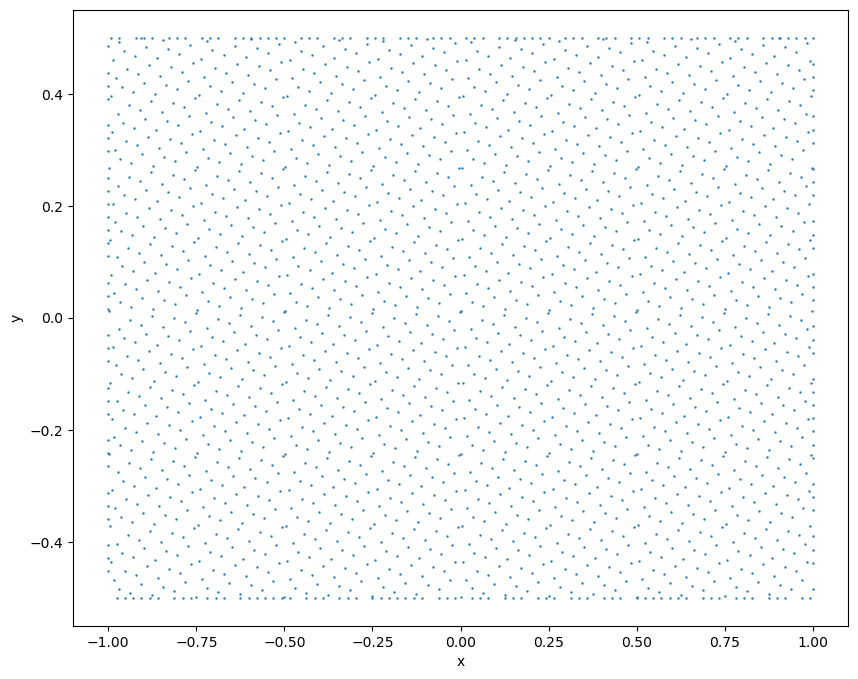

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(data.train_x_all[:,0], data.train_x_all[:,1], s= 0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
net = dde.maps.FNN([2] + [64]*5 + [3] , "tanh", "Glorot uniform")

In [11]:
model = dde.Model(data, net)
model.compile("adam",lr=1e-3)

Compiling model...
'compile' took 0.008789 s



In [12]:
losshistory, train_state = model.train(epochs = 10000)

Training model...



C:\Users\mecha\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Cause: could not parse the source code of <function <lambda> at 0x0000026388DC39C0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000026388DC39C0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000026388DC3C40>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000026388

In [13]:
dde.optimizers.config.set_LBFGS_options(maxiter= 3000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=False, isplot=False)

Compiling model...
'compile' took 0.076881 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
10000     [2.40e-03, 6.83e-04, 2.53e-03, 1.47e-02, 5.95e-03, 1.48e-02, 5.38e-03, 2.29e-04, 1.79e-05]    [2.06e-03, 5.48e-04, 9.62e-04, 1.47e-02, 5.95e-03, 1.48e-02, 5.38e-03, 2.29e-04, 1.79e-05]    []  
13000     [3.55e-04, 3.28e-04, 4.73e-04, 3.37e-03, 9.81e-04, 2.89e-03, 1.01e-03, 4.93e-06, 3.22e-06]    [2.13e-04, 1.76e-04, 1.31e-04, 3.37e-03, 9.81e-04, 2.89e-03, 1.01e-03, 4.93e-06, 3.22e-06]    []  

Best model at step 13000:
  train loss: 9.40e-03
  test loss: 8.77e-03
  test metric: []

'train' took 766.946313 s



In [18]:
samples = geom.random_points(500000)
result = model.predict(samples)

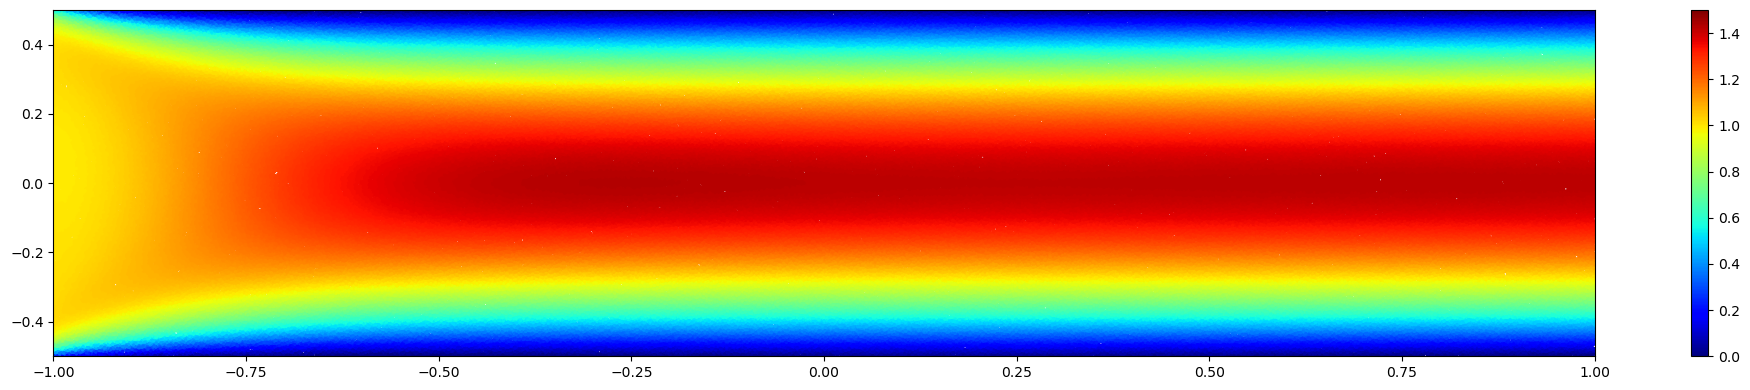

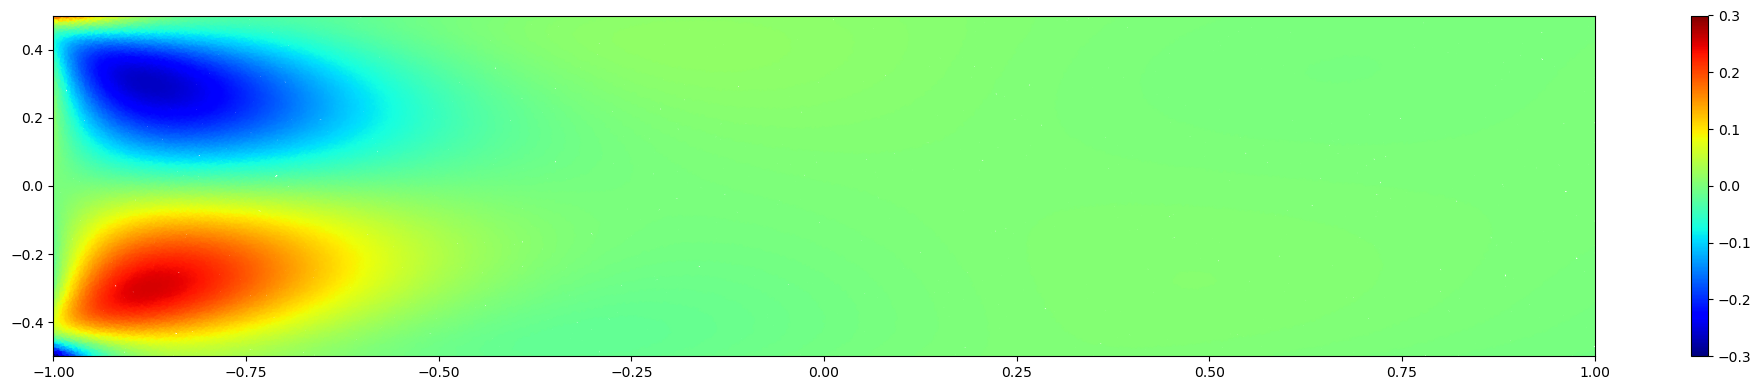

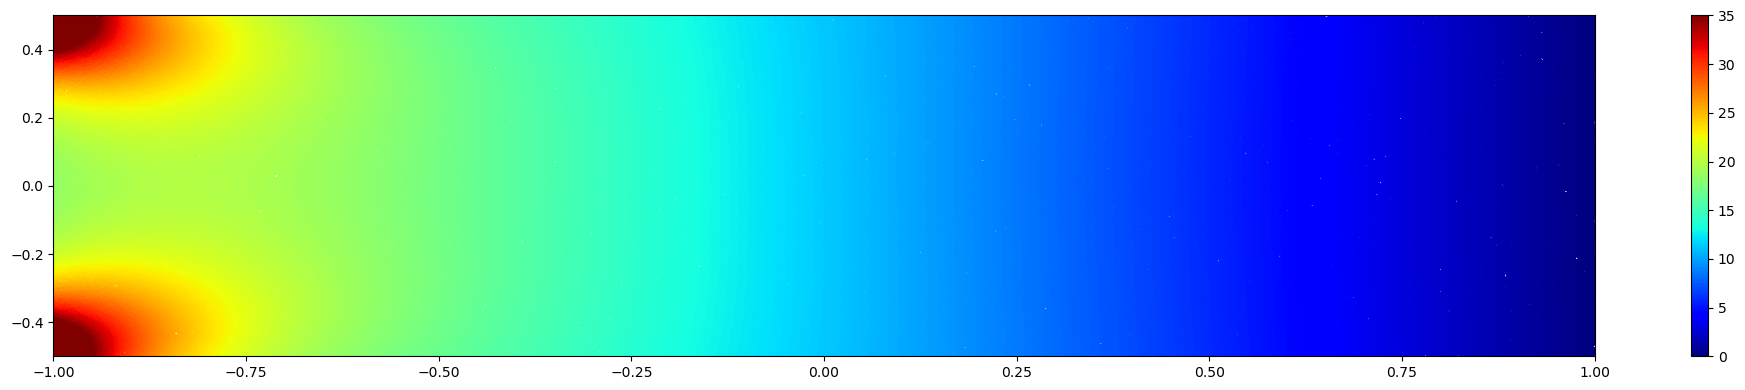

In [24]:
color_legend = [[0,1.5],[-0.3,0.3],[0,35]]

for idx in range(3):
    plt.figure(figsize=(20,4))
    plt.scatter(samples[:,0],
               samples[:,1],
               c = result[:,idx],
               cmap= 'jet',
               s=2)
    plt.colorbar()
    plt.clim(color_legend[idx])
    plt.xlim((0-L/2, L-L/2))
    plt.ylim((0-D/2, D-D/2))
    plt.tight_layout()
    plt.show()